Enter disk requests (comma-separated integers): 98,183,37,122,14,129,65,67
Enter initial head position: 53
Enter direction (Left/Right) for SCAN and CSCAN: Right


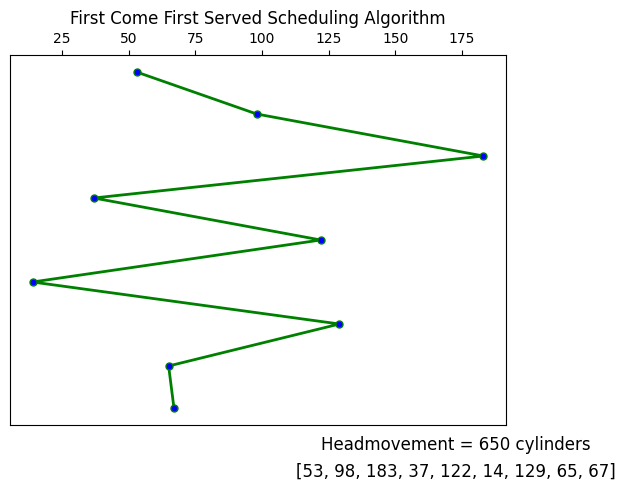

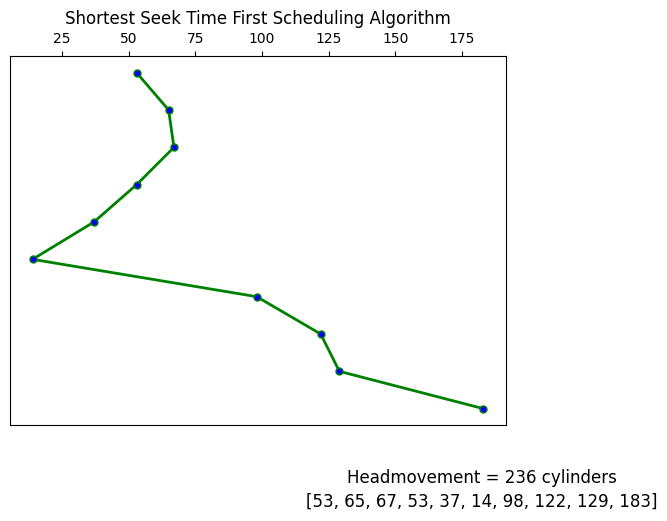

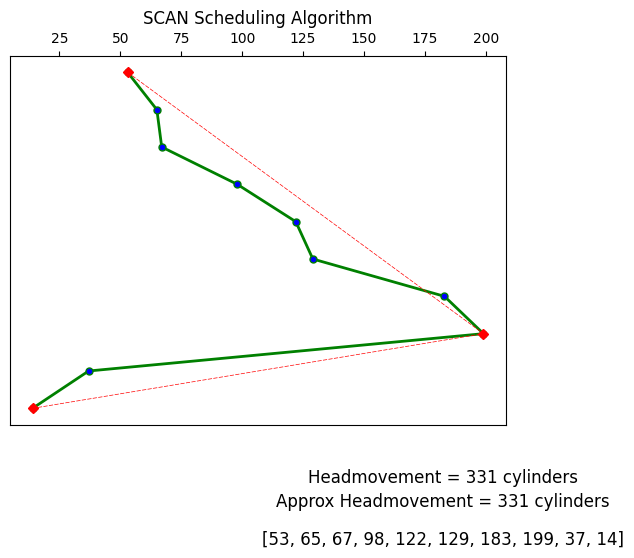

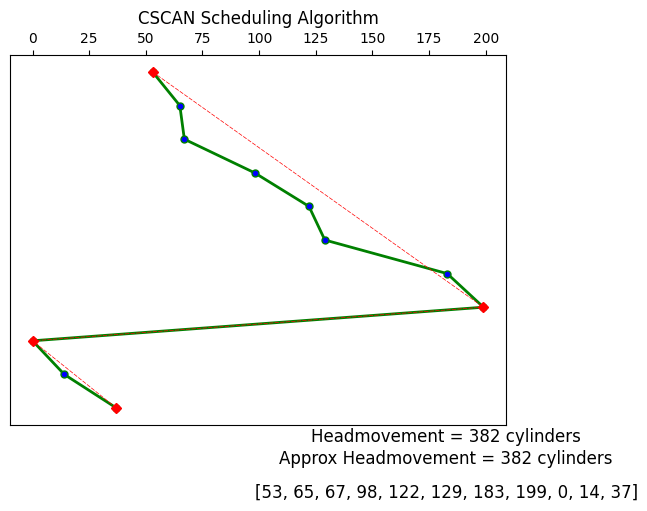

In [2]:
import matplotlib.pyplot as plt
import math

CYLINDER_MAX = 199

def FCFS(sequence,start):
    temp = sequence.copy()
    temp.insert(0,start)
    plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
    plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
    size = len(temp)
    x = temp
    y = []
    headmovement = 0
    for i in range(0,size):
        y.append(-i)
        if i!=size-1:
            headmovement = headmovement + abs(temp[i]-temp[i+1])
    string = 'Headmovement = ' + str(headmovement) + ' cylinders'
    string2 = str(temp)
    plt.plot(x,y, color="green", markerfacecolor = 'blue', marker='o', markersize = 5, linewidth = 2, label="FCFS")
    plt.ylim = (0,size)
    plt.xlim = (0,CYLINDER_MAX)
    plt.yticks([])
    plt.title("First Come First Served Scheduling Algorithm")
    plt.text(172.5, -8.85, string, horizontalalignment='center',verticalalignment='center',fontsize=12)
    plt.text(172.5, -9.5, string2, horizontalalignment='center',verticalalignment='center',fontsize=12)
    plt.show()

def SSTF(sequence,start):
    temp = sequence.copy()
    def next_in_sequence(seq,val):
        diff = 0
        mindiff = math.inf
        nextval = 0
        #print(seq)
        for i in range(0,len(seq)):
            if(seq[i]!=val):
                diff = abs(seq[i]-val)
                if(diff<mindiff):
                    mindiff=diff
                    nextval = seq[i]
        return nextval

    temp.insert(0,start)
    val = start
    x = []
    y = []
    size = 0
    x.append(start)
    headmovement = 0
    while(len(temp)):
        val = next_in_sequence(temp,val)
        #print(val)
        x.append(val)
        temp.remove(val)
    size = len(x)
    for i in range(0,size):
        y.append(-i)
        if i!=(size-1):
            headmovement = headmovement + abs(x[i]-x[i+1])
    string = 'Headmovement = ' + str(headmovement) + ' cylinders'
    string2 = str(x)

    plt.plot(x,y, color="green", markerfacecolor = 'blue', marker='o', markersize = 5, linewidth = 2, label="SSTF")
    plt.ylim = (0,size)
    plt.xlim = (0,CYLINDER_MAX)
    plt.yticks([])
    plt.title("Shortest Seek Time First Scheduling Algorithm")
    plt.text(182.5, -10.85, string, horizontalalignment='center',verticalalignment='center',fontsize=12)
    plt.text(182.5, -11.5, string2, horizontalalignment='center',verticalalignment='center',fontsize=12)
    plt.show()

def SCAN(sequence,start,direction):
    temp = sequence.copy()
    left = []
    right = []
    x = []
    y = []
    x_approx = []
    y_approx = []
    headmovement = 0
    headmovement_approx = 0
    x.append(start)
    if(direction=="Left"):
        for i in temp:
            if i<start:
                left.append(i)
            else:
                right.append(i)
        left.sort(reverse = True)
        for i in left:
            x.append(i)
        x.append(0)
        right.sort()
        for i in right:
            x.append(i)
        x_approx.append(start)
        x_approx.append(min(x))
        x_approx.append(max(x))
        headmovement_approx = abs(start-0)
        headmovement_approx = headmovement_approx + abs(0-max(x))
    elif(direction=="Right"):
        for i in temp:
            if i>start:
                right.append(i)
            else:
                left.append(i)
        right.sort()
        for i in right:
            x.append(i)
        x.append(CYLINDER_MAX)
        left.sort(reverse = True)
        for i in left:
            x.append(i)
        x_approx.append(start)
        x_approx.append(max(x))
        x_approx.append(min(x))
        headmovement_approx = abs(start-199)
        headmovement_approx = headmovement_approx + abs(199-min(x))



    y_approx.append(0)
    size = len(x)
    for i in range(0,size):
        y.append(-i)
        if(x[i]==0 or x[i]==199):
            y_approx.append(-i)
        if i!=(size-1):
            headmovement = headmovement + abs(x[i]-x[i+1])
        else:
            y_approx.append(-i)
    string = 'Headmovement = ' + str(headmovement) + ' cylinders'
    string2 = str(x)
    string3 = 'Approx Headmovement = ' + str(headmovement_approx) + ' cylinders'

    plt.plot(x,y, color="green", markerfacecolor = 'blue', marker='o', markersize = 5, linewidth = 2, label="SCAN")
    plt.plot(x_approx,y_approx, dashes = [6,2] , color="red", markerfacecolor = 'red', marker='D', markersize = 5, linewidth = 0.5, label="Approx SCAN")
    plt.ylim = (0,size)
    plt.xlim = (0,CYLINDER_MAX)
    plt.yticks([])
    plt.title("SCAN Scheduling Algorithm")
    plt.text(182.5, -10.85, string, horizontalalignment='center',verticalalignment='center',fontsize=12)
    plt.text(182.5, -12.5, string2, horizontalalignment='center',verticalalignment='center',fontsize=12)
    plt.text(182.5, -11.5, string3, horizontalalignment='center',verticalalignment='center',fontsize=12)
    plt.show()

def CSCAN(sequence, start, direction):
    temp = sequence.copy()
    left = []
    right = []
    x = []
    y = []
    x_approx = []
    y_approx = []
    headmovement = 0
    headmovement_approx = 0
    x.append(start)
    if(direction=="Left"):
        for i in temp:
            if i<start:
                left.append(i)
            else:
                right.append(i)
        left.sort(reverse = True)
        for i in left:
            x.append(i)
        x.append(0)
        x.append(CYLINDER_MAX)
        right.sort(reverse = True)
        for i in right:
            x.append(i)
        x_approx.append(start)
        x_approx.append(min(x))
        x_approx.append(max(x))
        x_approx.append(x[-1])
        headmovement_approx = abs(start-0)
        headmovement_approx = headmovement_approx + abs(0-max(x))
        headmovement_approx = headmovement_approx + abs(0-x[-1])
    elif(direction=="Right"):
        for i in temp:
            if i>start:
                right.append(i)
            else:
                left.append(i)
        right.sort()
        for i in right:
            x.append(i)
        x.append(CYLINDER_MAX)
        x.append(0)
        left.sort()
        for i in left:
            x.append(i)
        x_approx.append(start)
        x_approx.append(CYLINDER_MAX)
        x_approx.append(0)
        x_approx.append(x[-1])
        headmovement_approx = abs(start-199)
        headmovement_approx = headmovement_approx + abs(199-0)
        headmovement_approx = headmovement_approx + abs(0-x[-1])



    y_approx.append(0)
    size = len(x)
    for i in range(0,size):
        y.append(-i)
        if(x[i]==0 or x[i]==199):
            y_approx.append(-i)
        if i!=(size-1):
            headmovement = headmovement + abs(x[i]-x[i+1])
        else:
            y_approx.append(-i)
    string = 'Headmovement = ' + str(headmovement) + ' cylinders'
    string2 = str(x)
    string3 = 'Approx Headmovement = ' + str(headmovement_approx) + ' cylinders'

    plt.plot(x,y, color="green", markerfacecolor = 'blue', marker='o', markersize = 5, linewidth = 2, label="CSCAN")
    plt.plot(x_approx,y_approx, dashes = [6,2] , color="red", markerfacecolor = 'red', marker='D', markersize = 5, linewidth = 0.5, label="Approx CSCAN")
    plt.ylim = (0,size)
    plt.xlim = (0,CYLINDER_MAX)
    plt.yticks([])
    plt.title("CSCAN Scheduling Algorithm")
    plt.text(182.5, -10.85, string, horizontalalignment='center',verticalalignment='center',fontsize=12)
    plt.text(182.5, -12.5, string2, horizontalalignment='center',verticalalignment='center',fontsize=12)
    plt.text(182.5, -11.5, string3, horizontalalignment='center',verticalalignment='center',fontsize=12)
    plt.show()

def main():
    # Taking input from the user
    sequence = list(map(int, input("Enter disk requests (comma-separated integers): ").split(',')))
    start = int(input("Enter initial head position: "))
    direction = input("Enter direction (Left/Right) for SCAN and CSCAN: ")

    # Execute all algorithms
    FCFS(sequence, start)
    SSTF(sequence, start)
    SCAN(sequence, start, direction)
    CSCAN(sequence, start, direction)

if __name__ == "__main__":
    main()